## Observations and Insights 

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st # alias
from scipy.stats import linregress
import numpy as np

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)
#Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_data.duplicated(['Mouse ID', 'Timepoint'])
combined_data.loc[duplicate_mice==True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data=combined_data.loc[combined_data['Mouse ID']!='g989']

In [6]:
#Checking the number of mice in the clean DataFrame.
len(combined_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_mean = np.mean(combined_data['Tumor Volume (mm3)'])
data_median = np.median(combined_data['Tumor Volume (mm3)'])
data_variance = np.var(combined_data['Tumor Volume (mm3)'])
data_std = np.std(combined_data['Tumor Volume (mm3)'])
data_sem = st.sem(combined_data['Tumor Volume (mm3)'])

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Assemble the resulting series into a single summary dataframe.
#use dictionary that has keys to label and ":" in between
pd.DataFrame({'Mean':mean,
              'Median':median,
              'Variance':var,
              'Standard Deviation':std,
              'SEM':sem})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line
combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

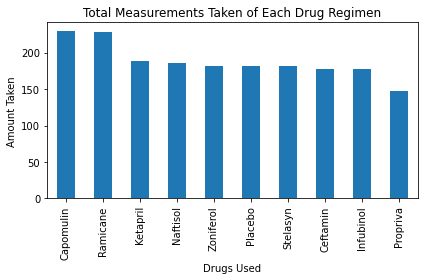

In [9]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
combined_data['Drug Regimen'].value_counts().plot(kind='bar')
plt.title("Total Measurements Taken of Each Drug Regimen")
plt.xlabel("Drugs Used")
plt.ylabel("Amount Taken")
plt.tight_layout()
plt.show()

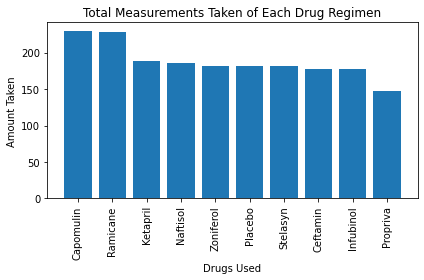

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data=combined_data['Drug Regimen'].value_counts()
plt.bar(data.index,data.values)
plt.xticks(rotation=90)
plt.title("Total Measurements Taken of Each Drug Regimen")
plt.xlabel("Drugs Used")
plt.ylabel("Amount Taken")
plt.tight_layout()
plt.show()

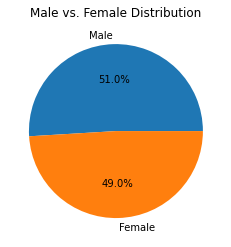

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
combined_data['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Male vs. Female Distribution")
plt.ylabel('')
plt.show()

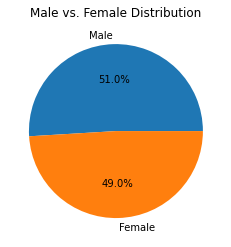

In [12]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
data=combined_data['Sex'].value_counts()
sex=["Male","Female"]
sizes=[958,922]
plt.pie(sizes,labels=sex,autopct="%1.1f%%")
plt.title("Male vs. Female Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
max_times=combined_data.groupby('Mouse ID', as_index=False)['Timepoint'].max()

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# max_times.merge(combined_data) <-- GOT WRONG THE FIRST TIME!
merged_data=max_times.merge(combined_data,on=['Mouse ID','Timepoint'],how="left") # <-- CORRECTION MADE!
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
#Put treatments into a list for for loop (and later for plot labels) Capomulin, Ramicane, Infubinol, and Ceftamin.
#Create empty list to fill with tumor vol data (for plotting)
drug_list=('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
temp_outliers=[]
for drug in drug_list:
    #Locate the rows which contain mice on each drug and get the tumor volumes
    temp_data=merged_data.loc[merged_data['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    #add subset
    temp_outliers.append(temp_data)
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles=temp_data.quantile([.25, .5, .75])
    lower_quartile=quartiles[0.25]
    upper_quartile=quartiles[0.75]
    iqr=upper_quartile-lower_quartile
    lower_bound=lower_quartile-(1.5*iqr)
    upper_bound=upper_quartile+(1.5*iqr)
    
    #Determine outliers using upper and lower bounds
    outliers=temp_data.loc[(temp_data>upper_bound) | (temp_data<lower_bound)]
    print(f"Outliers for {drug}:{outliers.values}")

Outliers for Capomulin:[]
Outliers for Ramicane:[]
Outliers for Infubinol:[36.3213458]
Outliers for Ceftamin:[]


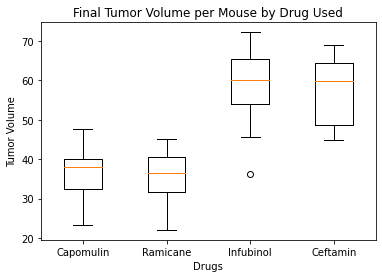

In [15]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
# plt.boxplot(temp_outliers) <-- old command to plot a box plot
plt.boxplot(temp_outliers, labels = drug_list)
plt.xlabel("Drugs")
plt.ylabel("Tumor Volume")
plt.title("Final Tumor Volume per Mouse by Drug Used")
plt.show()

## Line and Scatter Plots

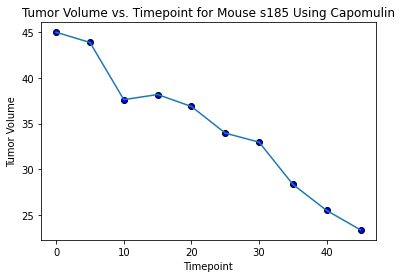

In [16]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185=combined_data.loc[combined_data['Mouse ID']=='s185']
s185
x_axis=s185['Timepoint']
y_axis=s185['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis, facecolors='blue', edgecolors='black')
plt.plot(x_axis, y_axis)

plt.title("Tumor Volume vs. Timepoint for Mouse s185 Using Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

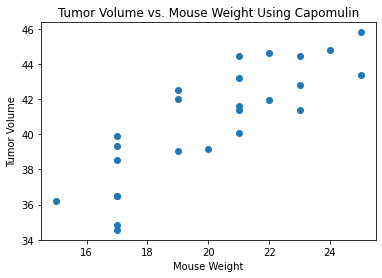

In [17]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data=combined_data.loc[combined_data['Drug Regimen']=='Capomulin']
x_axis=cap_data.groupby('Mouse ID')['Weight (g)'].mean()
y_axis=cap_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(x_axis, y_axis)

plt.title("Tumor Volume vs. Mouse Weight Using Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
#Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
st.pearsonr(x_axis, y_axis)[0]

0.8419363424694717

In [19]:
#Plot the linear regression model on top of the previous scatter plot.
def plot_regression(x_values, y_values, text_location):
    # main calculation for linreg
    (slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
    
    # calculate y-values for regression line
    predicted_y=slope*x_values+intercept
    # create text for line
    line_equation=f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # plotting
    plt.scatter(x_values,y_values) # blue points
    plt.plot(x_values,predicted_y,c='r') # red line
    plt.annotate(line_equation,text_location,c='r',fontsize=15) # red text

Text(0, 0.5, 'Tumor Volume')

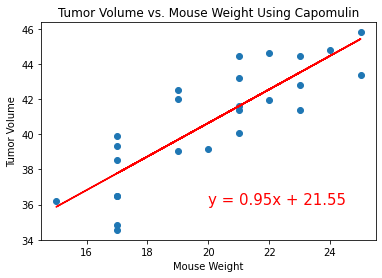

In [20]:
plot_regression(x_axis,y_axis,text_location=(20,36))
plt.title("Tumor Volume vs. Mouse Weight Using Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

In [21]:
#Look across all previously generated figures and tables and write at least three observations or inferences
#that can be made from the data. Include these observations at the top of notebook.

#1.Capomulin and Ramicane are the most taken drugs while Propriva is the least taken by about 1/4 of the most two most used ones
#2.The fact that not all drugs were used in the same amount can be misleading as to the results
#3.Capomulin is very effective on shrinking tumor sizes but this is only from a sample of one mouse so it may need to be compared
    #to more mice in order to see its overall efficacy
#4.The study for Infubinol is unreliable so it needs to be reviewed